In [42]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Output File (CSV)
output_data_file = "Resources/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
cities = ['kapaa',
 'attawapiskat',
 'portland',
 'saldanha',
 'barentsburg',
 'mar del plata',
 'nanakuli',
 'punta arenas',
 'truckee',
 'bethel',
 'jeannette',
 'dikson',
 'ilulissat',
 'kaitangata',
 'opotiki',
 'stoina',
 'ahuas',
 'albany',
 'uyuni',
 'marcona',
 'ushuaia',
 'vaini',
 'arraial do cabo',
 'mataura',
 'imbituba',
 'victoria',
 'geraldton',
 'iqaluit',
 'atuona',
 'kulhudhuffushi',
 'butaritari',
 'chokurdakh',
 'ribeira grande',
 'bredasdorp',
 'busselton',
 'bubaque',
 'katsuura',
 'taft',
 'we',
 'alofi',
 'kahului',
 'hilo',
 'sao filipe',
 'seara',
 'tsihombe',
 'cape town',
 'kodiak',
 'svetlogorsk',
 'nikolskoye',
 'alpena',
 'caravelas',
 'barrow',
 'kavaratti',
 'tiksi',
 'krasnoarmeysk',
 'hami',
 'westminster',
 'airai',
 'pacific grove',
 'faanui',
 'samusu',
 'illoqqortoormiut',
 'bani walid',
 'bluff',
 'lubumbashi',
 'san cristobal',
 'ferrol',
 'jardim',
 'sioux lookout',
 'vanimo',
 'batagay-alyta',
 'evanston',
 'clyde river',
 'carnarvon',
 'torbay',
 'kruisfontein',
 'castro',
 'meulaboh',
 'nome',
 'gat',
 'santa lucia',
 'taolanaro',
 'chuy',
 'ayagoz',
 'mahebourg',
 'tabou',
 'port alfred',
 'maniitsoq',
 'georgetown',
 'hede',
 'hermanus',
 'provideniya',
 'port elizabeth',
 'avarua',
 'amderma',
 'opuwo',
 'harindanga',
 'kuito',
 'saskylakh',
 'margate',
 'bengkulu',
 'agirish',
 'tingi',
 'nuqui',
 'new norfolk',
 'paragominas',
 'qostanay',
 'palabuhanratu',
 'le havre',
 'tasiilaq',
 'rikitea',
 'kalamansig',
 'gerede',
 'ketchikan',
 'coxim',
 'high level',
 'manaus',
 'yellowknife',
 'natchez',
 'maceio',
 'qaanaaq',
 'vilhena',
 'hofn',
 'port lincoln',
 'cherskiy',
 'bonavista',
 'hobart',
 'saint-pierre',
 'puerto ayora',
 'havelock',
 'cap malheureux',
 'luebo',
 'fairbanks',
 'yanam',
 'igarka',
 'east london',
 'muroto',
 'tuatapere',
 'torbat-e jam',
 'vrangel',
 'hof',
 'coihaique',
 'korla',
 'souillac',
 'kavieng',
 'karratha',
 'constitucion',
 'bilibino',
 'roma',
 'flin flon',
 'mayo',
 'reporoa',
 'tilichiki',
 'mehamn',
 'shimoda',
 'broken hill',
 'port macquarie',
 'lompoc',
 'traralgon',
 'goderich',
 'natal',
 'chagda',
 'saint-philippe',
 'houma',
 'chengmai',
 'ponta do sol',
 'lubango',
 'nelson bay',
 'grindavik',
 'sistranda',
 'severo-kurilsk',
 'baiyin',
 'esperance',
 'kaeo',
 'mount gambier',
 'pangai',
 'lagoa',
 'caxito',
 'nerekhta',
 'salalah',
 'jamestown',
 'upernavik',
 'los llanos de aridane',
 'batemans bay',
 'ambon',
 'suozhen',
 'hasaki',
 'zhigansk',
 'port blair',
 'lebu',
 'ikom',
 'waingapu',
 'te anau',
 'galle',
 'avera',
 'menongue',
 'synya',
 'ambovombe',
 'abnub',
 'paramonga',
 'asfi',
 'poum',
 'mvuma',
 'longyearbyen',
 'kodinsk',
 'faro',
 'nicoya',
 'merida',
 'sao mateus',
 'nizhneyansk',
 'nguiu',
 'norman wells',
 'prabumulih',
 'akyab',
 'olafsvik',
 'bolungarvik',
 'tezu',
 'west richland',
 'fort nelson',
 'chimbote',
 'asau',
 'oyama',
 'bambous virieux',
 'pangnirtung',
 'namibe',
 'mandera',
 'masterton',
 'talnakh',
 'tuktoyaktuk',
 'hambantota',
 'broome',
 'hithadhoo',
 'palana',
 'amuntai',
 'khani',
 'riyadh',
 'mogadishu',
 'narsaq',
 'bardiyah',
 'ereymentau',
 'oranjemund',
 'san patricio',
 'atar',
 'nanortalik',
 'linxia',
 'beringovskiy',
 'lasa',
 'kayes',
 'khatanga',
 'anito',
 'adana',
 'marystown',
 'sentyabrskiy',
 'lavrentiya',
 'abapo',
 'maykain',
 'mitsamiouli',
 'isabela',
 'ko samui',
 'itarema',
 'aquiraz',
 'piney green',
 'mys shmidta',
 'matagami',
 'ninghai',
 'hibbing',
 'aberdeen',
 'ostrovnoy',
 'dryden',
 'gualaquiza',
 'coos bay',
 'sinnamary',
 'sorvag',
 'saint anthony',
 'cidreira',
 'tumannyy',
 'saint george',
 'loandjili',
 'senanga',
 'hamilton',
 'touros',
 'nouadhibou',
 'zhanatas',
 'thompson',
 'manzhouli',
 'nakhon phanom',
 'lolua',
 'havoysund',
 'tual',
 'puerto escondido',
 'rolim de moura',
 'hay river',
 'elbistan',
 'kilindoni',
 'chunskiy',
 'kushima',
 'port-gentil',
 'lata',
 'leningradskiy',
 'cozumel',
 'haines junction',
 'cayenne',
 'niamey',
 'belushya guba',
 'pouembout',
 'cabo san lucas',
 'crab hill',
 'vao',
 'guatire',
 'sitka',
 'grand river south east',
 'thinadhoo',
 'lodja',
 'umzimvubu',
 'enumclaw',
 'lovozero',
 'nabire',
 'urumqi',
 'townsville',
 'kamenskoye',
 'antofagasta',
 'klaksvik',
 'yilan',
 'orcotuna',
 'vostok',
 'ust-uda',
 'kuah',
 'alice town',
 'yei',
 'nishihara',
 'taitung',
 'matara',
 'umm durman',
 'vestmannaeyjar',
 'teixoso',
 'sterling',
 'heyang',
 'fortuna',
 'aflu',
 'vila franca do campo',
 'zaysan',
 'diamantino',
 'necochea',
 'vaitupu',
 'yarada',
 'isangel',
 'ozgon',
 'xuddur',
 'half moon bay',
 'svetlyy',
 'wasilla',
 'zhezkazgan',
 'dolores',
 'neuquen',
 'ronda',
 'jackson',
 'parkes',
 'tonantins',
 'khash',
 'zheleznodorozhnyy',
 'madisonville',
 'saint-augustin',
 'bambanglipuro',
 'huron',
 'talcahuano',
 'jalu',
 'whitehorse',
 'deputatskiy',
 'dwarka',
 'sao paulo de olivenca',
 'aasiaat',
 'pisco',
 'nyazepetrovsk',
 'lieksa',
 'tutoia',
 'klyuchi',
 'simao',
 'butterworth',
 'mount barker',
 'hoi an',
 'joshimath',
 'karamea',
 'sao gabriel da cachoeira',
 'tubruq',
 'saleaula',
 'ancud',
 'barao de melgaco',
 'nemuro',
 'melendugno',
 'krasnoselkup',
 'morganton',
 'otukpo',
 'teguise',
 'vytegra',
 'barcelos',
 'masallatah',
 'veraval',
 'inhambane',
 'vitim',
 'barillas',
 'talaya',
 'san policarpo',
 'kenitra',
 'yurya',
 'kuldur',
 'ust-omchug',
 'muli',
 'taber',
 'padang',
 'verkhoyansk',
 'tatvan',
 'iisalmi',
 'kayerkan',
 'timbiras',
 'desaguadero',
 'baldeogarh',
 'matola',
 'vanderhoof',
 'ossora',
 'ndioum',
 'aporawan',
 'pemangkat',
 'ayan',
 'wasco',
 'henties bay',
 'manicore',
 'front royal',
 'beloha',
 'skibbereen',
 'redcliffe',
 'san juan',
 'kuche',
 'luderitz',
 'lazo',
 'mercedes',
 'ndele',
 'mana',
 'mahajanga',
 'santiago del estero',
 'pochutla',
 'bang saphan',
 'saryshagan',
 'sayyan',
 'nsoko',
 'rewari',
 'san andres',
 'gazojak',
 'makakilo city',
 'odweyne',
 'jawhar',
 'bitung',
 'ucluelet',
 'hurghada',
 'husavik',
 'rio grande',
 'ellisras',
 'pevek',
 'kumluca',
 'baherden',
 'hobyo',
 'xam nua',
 'nuuk',
 'bereda',
 'abu samrah',
 'brae',
 'lucea',
 'bowen',
 'north bend',
 'katherine',
 'tekax',
 'chernyshevskiy',
 'the valley',
 'listvyagi',
 'concepcion',
 'idritsa',
 'leh',
 'susanville',
 'willmar',
 'ekibastuz',
 'moindou',
 'kudahuvadhoo',
 'juneau',
 'alice springs',
 'hovd',
 'paamiut',
 'ericeira',
 'karaul',
 'christchurch',
 'lokosovo',
 'mahadday weyne',
 'moerai',
 'marsh harbour',
 'yulara',
 'chake chake',
 'auki',
 'borovoy',
 'hanzhong',
 'santa isabel do rio negro',
 'dukat',
 'jasper',
 'puerto leguizamo',
 'puerto baquerizo moreno',
 'camasca',
 'sept-iles',
 'gazli',
 'utiroa',
 'roald',
 'ambulu',
 'carauari',
 'nara',
 'qax',
 'kazalinsk',
 'ballina',
 'valdemarpils',
 'abonnema',
 'lidkoping',
 'sicuani',
 'albanel',
 'murgab',
 'puerto del rosario',
 'kamina',
 'casa nova',
 'novyy urengoy',
 'cabildo',
 'atlantic beach',
 'mahanoro',
 'boysun',
 'lensk',
 'bilma',
 'bulungu',
 'grand-lahou',
 'qingyuan',
 'mayumba',
 'sorong',
 'coahuayana',
 'temaraia',
 'swinoujscie',
 'novyy buh',
 'drayton valley',
 'point pedro',
 'pelym',
 'naze',
 'ust-ilimsk',
 'matamoros',
 'mouila',
 'marsaxlokk',
 'kankan',
 'la malbaie',
 'pangody',
 'san bartolome de tirajana',
 'bosaso',
 'koygorodok',
 'ngukurr',
 'la ronge',
 'oksfjord',
 'palmer',
 'hendijan',
 'ponta delgada',
 'manta',
 'columbus',
 'labuhan',
 'lorengau',
 'lima',
 'viligili',
 'maple creek',
 'wanning',
 'amazar',
 'thio',
 'dayong',
 'kalmunai',
 'yumen',
 'cagayan de tawi-tawi',
 'ahipara',
 'yerbogachen',
 'poopo',
 'kalbay']

In [17]:
# OpenWeatherMap API Key


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api

In [38]:
# Perform API calls

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")

        # Increase counter by one 
        record= record + 1

        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=kapaa
City not found. Skipping...
Processing Record 2 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=portland
Processing Record 3 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=saldanha
City not found. Skipping...
Processing Record 4 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=mar del plata
Processing Record 5 | Nānākuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=nanakuli
Processing Record 6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=punta arenas
Processing Record

Processing Record 57 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=bluff
Processing Record 58 | Lubumbashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=lubumbashi
Processing Record 59 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=san cristobal
Processing Record 60 | Ferrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=ferrol
Processing Record 61 | Jardim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=jardim
Processing Record 62 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=sioux lookout
Processing Record 63 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf4

Processing Record 114 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=port lincoln
Processing Record 115 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=cherskiy
Processing Record 116 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=bonavista
Processing Record 117 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=hobart
Processing Record 118 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=saint-pierre
Processing Record 119 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=puerto ayora
Processing Record 120 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442

Processing Record 170 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=upernavik
Processing Record 171 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=los llanos de aridane
Processing Record 172 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=batemans bay
Processing Record 173 | Ambon City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=ambon
Processing Record 174 | Suozhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=suozhen
Processing Record 175 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=hasaki
Processing Record 176 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 227 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=san patricio
Processing Record 228 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=atar
Processing Record 229 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=nanortalik
Processing Record 230 | Linxia Chengguanzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=linxia
Processing Record 231 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=beringovskiy
Processing Record 232 | Laas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=lasa
Processing Record 233 | Kayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b

Processing Record 282 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=cabo san lucas
City not found. Skipping...
Processing Record 283 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=vao
Processing Record 284 | Guatire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=guatire
Processing Record 285 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=sitka
City not found. Skipping...
Processing Record 286 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=thinadhoo
Processing Record 287 | Lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=lodja
City not found. Skipping...
Processing Record 288 | Enumclaw
http://api.openweatherm

Processing Record 337 | Dwārka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=dwarka
Processing Record 338 | São Paulo de Olivença
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=sao paulo de olivenca
Processing Record 339 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=aasiaat
Processing Record 340 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=pisco
Processing Record 341 | Nyazepetrovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=nyazepetrovsk
Processing Record 342 | Lieksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=lieksa
Processing Record 343 | Tutóia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a

Processing Record 393 | Redcliffe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=redcliffe
Processing Record 394 | San Juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=san juan
City not found. Skipping...
Processing Record 395 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=luderitz
Processing Record 396 | Lazo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=lazo
Processing Record 397 | Mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=mercedes
Processing Record 398 | Ndélé
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=ndele
Processing Record 399 | Mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1

City not found. Skipping...
Processing Record 449 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=moerai
Processing Record 450 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=marsh harbour
Processing Record 451 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=yulara
Processing Record 452 | Chake Chake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=chake chake
Processing Record 453 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=auki
Processing Record 454 | Borovoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=borovoy
Processing Record 455 | Hanzhong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163

Processing Record 505 | San Bartolomé de Tirajana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=san bartolome de tirajana
Processing Record 506 | Bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=bosaso
Processing Record 507 | Koygorodok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=koygorodok
City not found. Skipping...
Processing Record 508 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=la ronge
Processing Record 509 | Øksfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=oksfjord
Processing Record 510 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163b442822a39c5c1b0e98450bf46574&q=palmer
City not found. Skipping...
Processing Record 511 | Ponta Delgada
http:/

In [19]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [20]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,40,US,1592656320,83,22.08,-159.32,77.00,12.75
1,Portland,100,US,1592656038,77,45.52,-122.68,64.99,3.29
2,Saldanha,0,ZA,1592656322,68,-33.01,17.94,66.20,8.05
3,Mar del Plata,61,AR,1592656130,70,-38.00,-57.56,52.00,4.70
4,Nānākuli,40,US,1592656324,73,21.39,-158.15,77.00,3.36


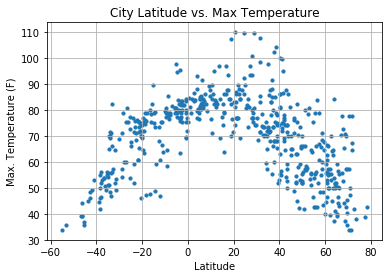

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

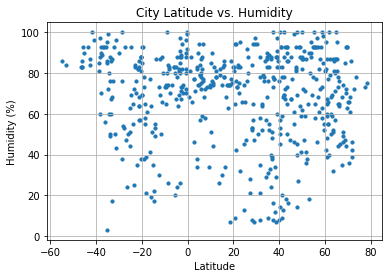

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

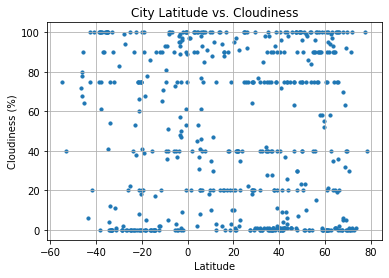

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

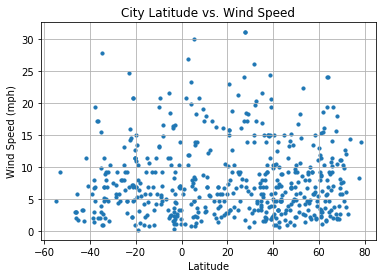

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [43]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.71


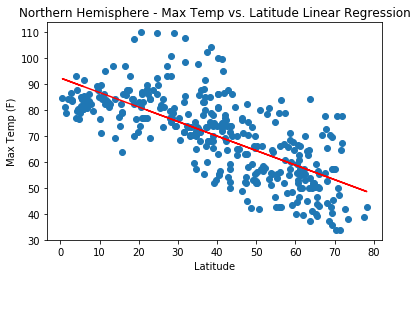

In [44]:
# Call an function #1
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Output_Plots/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.77


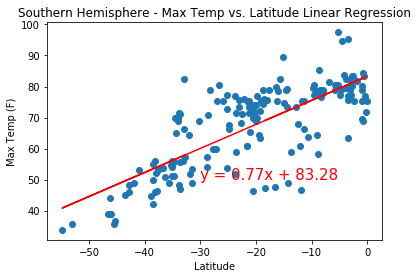

In [45]:
# Call an function #1
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Output_Plots/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : -0.01


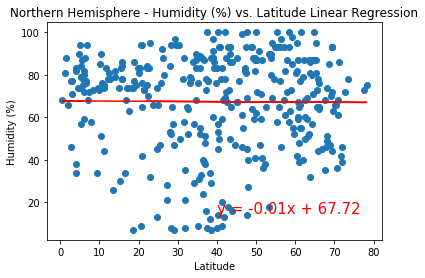

In [46]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Output_Plots/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.07


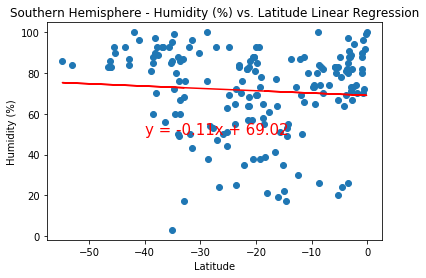

In [47]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Output_Plots/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.06


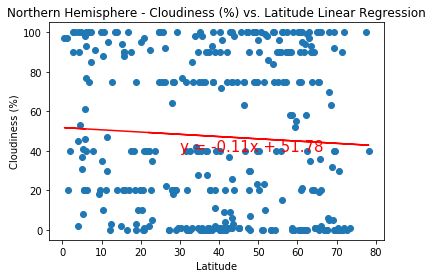

In [48]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linaer Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Output_Plots/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.0


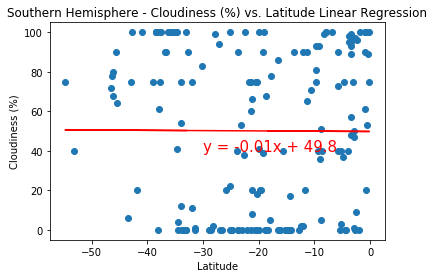

In [49]:
# Southern hem - cloudiness vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Output_Plots/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : -0.1


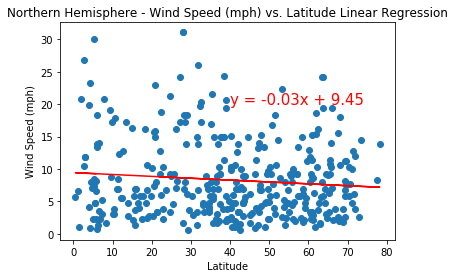

In [50]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Output_Plots/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : 0.04


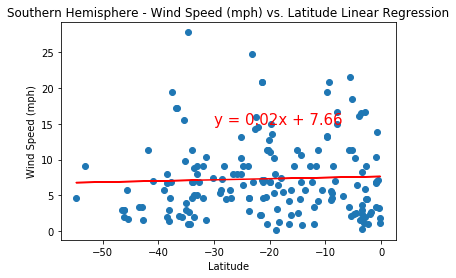

In [51]:
# Southern hem - Windspeed (mph) vs. Latitude Linear Regression
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Output_Plots/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")